# Jerusalem National Park Ebird Exploration

The following notebook consists of the following parts:

1. Data preparation.
2. Data cleaning and creation of daily dataframes.
3. Data exploration and application of two-sample tests for one-dimensional data.

In this Jupyter Notebook, I work with daily bird observations from the Jerusalem Bird Observatory, which were downloaded via eBird. eBird is a citizen science project that allows users to report their bird observations, including bird species, location, duration of observation, and bird counts.

Here are the relevant links:

- eBird official site: [https://ebird.org/home](https://ebird.org/home)
- Jerusalem Bird Observatory: [https://ebird.org/hotspot/L967976](https://ebird.org/hotspot/L967976)
- Instructions for accessing the data: Please note that you need to request permission from eBird to download the data. [https://ebird.org/data/download](https://ebird.org/data/download)

Black bird image from Jerusalem Observatory (Photographed by me in June 2022)



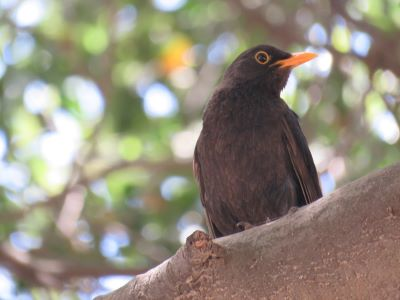






## Data preparations:


In [154]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

Data Loading:    

In [157]:
raw_data = pd.read_csv('Jerusalem_Non_Binary_Vector_Data.csv',index_col=0)
raw_data.sort_values('Date', inplace = True)
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['Time'] = pd.to_datetime(raw_data['Time'])

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,11,16,19,20,23,28,30,36,37,38,40,44,46,50,51,54,57,59,61,64,67,72,75,76,77,79,80,82,83,86,87,88,94,96,98,100,102,104,105,106,109,110,117,121,122,125,126,128,132,139,143,146,151,153,154,159,161,163,172,173,178,179,186,187,190,193,196,197,199,200,201,202,203,207,208,211,214,219,223,226,227,245,248,250,251,252,253,254,261,262,263,268) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


View the dataframe:

In [158]:
raw_data.head(3)

,Submission ID,Date,Time,Distance Traveled (km),Duration (Min),Little Stint,Spotted Flycatcher,Rock Bunting,Green Warbler,diurnal raptor sp.,...,Lesser Spotted Eagle,Eurasian Moorhen,snipe sp.,falcon sp.,Pallid Swift,Common Raven,Great Bittern,Common/Long-legged Buzzard,Eurasian Thick-knee,European Honey-buzzard
0,S57172024,1975-03-28,NaT,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S16057320,1976-07-03,2023-06-15 15:00:00,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S47219537,1978-04-12,NaT,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,X,0,0,0,0


There is an issue with the 'X' values, which indicates that the observer was uncertain about the exact count of birds. Although this data is not completely missing, it poses a challenge due to the potential variability in count values. To address this, we will replace the 'X' values with a count of 1. Eventually, I will consolidate all count values for the same day.

In [159]:
raw_data.replace('X',1,inplace = True)
all_birds_names = raw_binary_data.columns.to_list()[5:]
raw_data[all_birds_names] = raw_data[all_birds_names].astype('int64')

## Creating Daily Data:

I think that if we have few observations in the same date, then it can be a good idea to combine this observations.
Therefore, we will create a daily data.
It can be trivial when the data is binary. However, for the non-binary data it is different.

Lets consider, the following situation:
We have two observers who counted ducks. Observer A counted 20 and Observer B counted 30 in the same area. 
Maybe the counted the same ducks, therefore the solution might be to take the Max(20,30).

In [9]:
daily_data = raw_data.dropna(axis=1).iloc[:,1:].groupby('Date').max()
daily_data.head(3)

,Little Stint,Spotted Flycatcher,Rock Bunting,Green Warbler,diurnal raptor sp.,Song Thrush,European Greenfinch,Common Wood-Pigeon,Spotted Redshank,Lesser Black-backed Gull,...,Lesser Spotted Eagle,Eurasian Moorhen,snipe sp.,falcon sp.,Pallid Swift,Common Raven,Great Bittern,Common/Long-legged Buzzard,Eurasian Thick-knee,European Honey-buzzard
Date,,,,,,,,,,,,,,,,,,,,,
1975-03-28,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1976-07-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978-04-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Save daily data as csv:

In [160]:
daily_data.to_csv('daily_data_jerusalem_observations.csv')

#### I will create example graphs to illustrate the data:

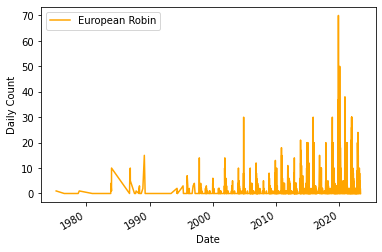

In [161]:
daily_data['European Robin'].plot(color ='orange',label='European Robin')
plt.ylabel('Daily Count')
plt.legend()  

Important notice: Over the years, we have observed an increase in the amount of available data compared to earlier years. This can be attributed to a growing number of individuals contributing their observations through eBird.

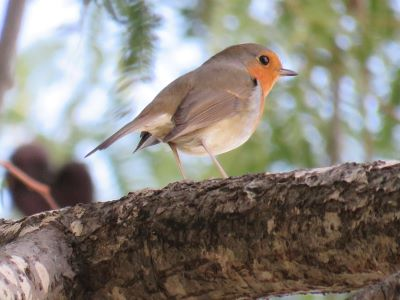

### Drift Exploration with Cumulative Empirical Distribution: Smirnov-Kolmogorov and Cramer-Von Mises Tests

This section will perform two-sample tests using the Smirnov-Kolmogorov and Cramer-Von Mises tests to detect changes based on differences in cumulative empirical distributions. Our goal is to identify variations in the annual daily distribution of specific bird species.

The Smirnov-Kolmogorov test focuses on differences in the center of the distributions, while the Cramer-Von Mises test emphasizes the tails of the distributions.

For a more comprehensive understanding of these tests, I recommend referring to the following article:
https://www.nbi.dk/~petersen/Teaching/Stat2017/Power_Comparisons_of_Shapiro-Wilk_Kolmogorov-Smirn.pdf

#### Important Note:

Please keep in mind that these tests compare the cumulative empirical distributions and do not take into consideration the data structure.

In [190]:
def smirnov_kolmagorov_test(sample1:pd.DataFrame, sample2:pd.DataFrame, significance_value:float)-> bool:
    pvalue = stats.ks_2samp(sample1, sample2)[1]
    print(f'Smirnov Kolmagorov pvalue is: {pvalue}')
    if pvalue < significance_value:
        print('There is a drift')
        return True
    else:
        print('There is not drift')
        return False
    
def cramer_von_mises_test(sample1:pd.DataFrame, sample2:pd.DataFrame, significance_value:float)-> bool:
    pvalue = stats.cramervonmises_2samp(sample1, sample2).pvalue
    print(f'Cramer Von Mises pvalue is: {pvalue}')
    if pvalue < significance_value:
        print('There is a drift')
        return True
    else:
        print('There is not drift')
        return False   

def apply_tests(bird_name:str,data: pd.DataFrame, baseline_period: slice, comparison_period: slice, significance_value:float):
    """
    This function performs the two tests mentioned above for the selected bird species.
    The function does not return any value.
    """
    sample1 = data.loc[baseline_period,bird_name]
    sample2 = data.loc[comparison_period,bird_name]
    smirnov_kolmagorov_test(sample1,sample2,significance_value)
    cramer_von_mises_test(sample1,sample2,significance_value)
    

In [191]:
def plot_daily_bird_count_for_two_time_periods(
    bird_name: str,
    color_associated_with_the_bird: str,
    data: pd.DataFrame,
    baseline_period: slice,
    comparison_period: slice,
    center_date: dt.datetime
):
    sample1 = data.loc[baseline_period,bird_name]
    sample2 = data.loc[comparison_period,bird_name]
    s = pd.concat([sample1,sample2])
    s.plot(color = color_associated_with_the_bird,label=bird_name)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Daily Count')
    plt.ylim(0)
    plt.axvline(center_date,linewidth=4, color='red',linestyle ='--')
    plt.title(f'Jerusalem Daily Count of {bird_name}')    

#### In the upcoming cells, we will examine whether the tests can detect any drift for each of the different bird species. We will assess if the tests have the capability to identify changes or variations in the observed patterns for each species.

2022-04-02 00:00:00


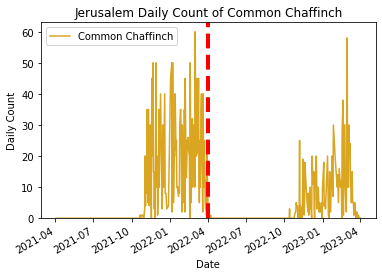

In [217]:
baseline_period = slice('2021-04-03','2022-04-02')
comparison_period = slice('2022-04-03','2023-04-02')
center_date = dt.datetime(2022, 4,2)
bird_name = 'Common Chaffinch'
#apply_tests(bird_name,daily_data, baseline_period, comparison_period, significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'goldenrod',
                                           daily_data,baseline_period,comparison_period, center_date)

In [200]:
apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)

Smirnov Kolmagorov pvalue is: 0.0005700873529295666
There is a drift
Cramer Von Mises pvalue is: 0.0002614438652125406
There is a drift


The Common Chaffinch is a winter visitor in Israel. Analyzing the graph reveals a noticeable drift between the two time periods, indicating a significant change. In both cases, both tests confirm the presence of a drift for this species.

Smirnov Kolmagorov pvalue is: 0.5501220608504814
There is not drift
Cramer Von Mises pvalue is: 0.5708639264434829
There is not drift


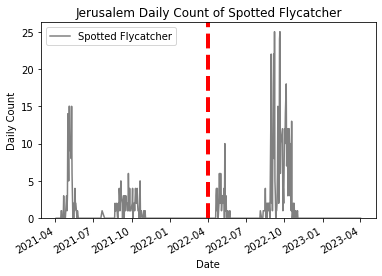

In [201]:
bird_name = 'Spotted Flycatcher'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'gray',
                                           daily_data,baseline_period,comparison_period, center_date)

In this case, the graph indicates a noticeable drift between the two time periods. Surprisingly, both tests failed to detect the drift, as reflected in their high p-values.

Smirnov Kolmagorov pvalue is: 0.16235889856778565
There is not drift
Cramer Von Mises pvalue is: 0.002345024041143784
There is a drift


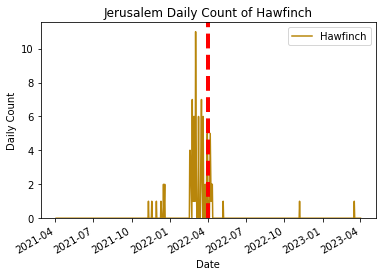

In [202]:
bird_name = 'Hawfinch'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'darkgoldenrod',
                                           daily_data,baseline_period,comparison_period, center_date)



In this case, it is evident that there is a noticeable drift between the two time periods. Last year, there were hardly any visits of Hawfinches at the Jerusalem Observatory station.

However, it is observed that the Smirnov-Kolmogorov test failed to detect this extremely clear case. The reason for this could be attributed to the abundance of zero values in both time periods, indicating that this bird species may only appear during migration seasons.

Smirnov Kolmagorov pvalue is: 0.030288477354457444
There is a drift
Cramer Von Mises pvalue is: 0.02102409522435056
There is a drift


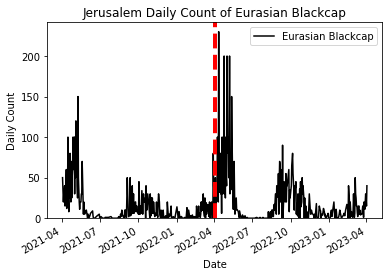

In [203]:
bird_name = 'Eurasian Blackcap'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'black',
                                           daily_data,baseline_period,comparison_period, center_date)

According to the graph, there is a clear drift observed in this case. Both tests successfully detect the drift. It is important to note that in this particular case, there are not many zero counts, unlike the previous bird species we examined.

Smirnov Kolmagorov pvalue is: 0.9931863444850676
There is not drift
Cramer Von Mises pvalue is: 0.7922292910964921
There is not drift


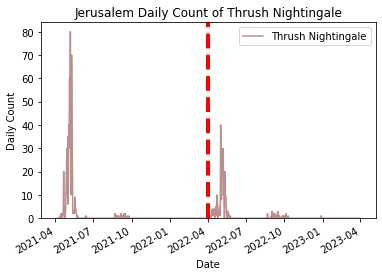

In [204]:
bird_name = 'Thrush Nightingale'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'rosybrown',
                                           daily_data,baseline_period,comparison_period, center_date)

In this case, a noticeable drift is observed between the two periods. However, both tests fail to detect it, possibly due to the abundance of zero values present in both time periods.

Smirnov Kolmagorov pvalue is: 1.7466033725830511e-07
There is a drift
Cramer Von Mises pvalue is: 4.1309178300252825e-11
There is a drift


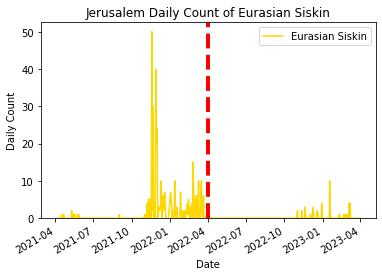

In [206]:
bird_name = 'Eurasian Siskin'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'gold',
                                           daily_data,baseline_period,comparison_period, center_date)

In this case both tests detect the drift.

Smirnov Kolmagorov pvalue is: 2.6025526309092824e-05
There is a drift
Cramer Von Mises pvalue is: 3.45344253194213e-08
There is a drift


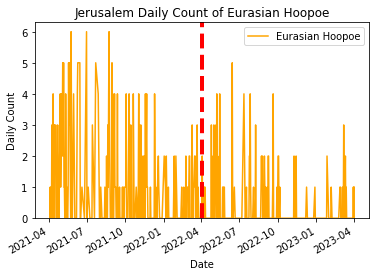

In [208]:
bird_name = 'Eurasian Hoopoe'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'orange',
                                           daily_data,baseline_period,comparison_period, center_date)

The graph clearly indicates a significant drift between the two time periods. Both tests successfully detect this drift.

Smirnov Kolmagorov pvalue is: 0.7643085038128097
There is not drift
Cramer Von Mises pvalue is: 0.5420802599314791
There is not drift


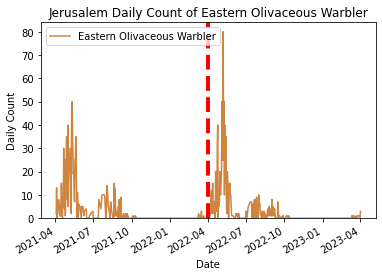

In [211]:
bird_name = 'Eastern Olivaceous Warbler'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'peru',
                                           daily_data,baseline_period,comparison_period, center_date)

In this case, there is a noticeable difference between the selected time periods, although it may not be as significant as in the previous cases. However, both tests failed to detect the drift.

Smirnov Kolmagorov pvalue is: 0.08565025952953684
There is not drift
Cramer Von Mises pvalue is: 0.0036946043267753748
There is a drift


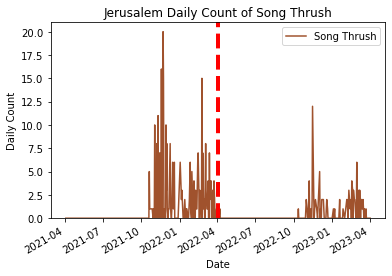

In [212]:
bird_name = 'Song Thrush'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'sienna',
                                           daily_data,baseline_period,comparison_period, center_date)

In this case, the drift between the two periods is noticeably significant. However, only one test succeeded: the Cramer Von Mises test.

Smirnov Kolmagorov pvalue is: 0.46136071266933504
There is not drift
Cramer Von Mises pvalue is: 0.07695044868051248
There is not drift


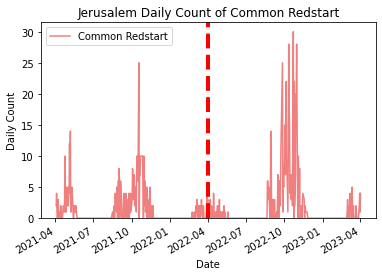

In [213]:
bird_name = 'Common Redstart'

apply_tests(bird_name,daily_data,baseline_period,comparison_period,significance_value=0.05)
plot_daily_bird_count_for_two_time_periods(bird_name,'lightcoral',
                                           daily_data,baseline_period,comparison_period, center_date)

In this case, the drift between the time periods is noticeably clear. However, both tests failed to detect the drift, although the Cramer Von Mises test came close to detecting it.

## Summary and Conclusion:
In the last section, we explored the annual daily distribution of at least ten different bird species (except for the European Hoopoe). Based on our analysis, we gained the following insights:

- The data, collected through human observers, generally makes sense, indicating its reliability.

- We observed a decline in numbers for some species compared to the previous time period, while others showed an increase.

- Despite our efforts, the selected two-sample tests often failed to detect a drift, with the exception of the Cramer Von Mises test, which demonstrated a better ability to detect drift.

Based on these findings, it appears that the selected two-sample tests may not be well-suited for detecting drift in annual bird counts. Possible reasons for this include:

- Insufficient consideration of seasonality and the structure of the time series data.
- The presence of an abundance of zero values in both time periods.

It is important to explore alternative approaches or consider additional factors when analyzing annual bird count data.